In [12]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

In [37]:
# 1. CSV 파일에서 유동인구 데이터 및 도로링크 데이터를 읽어옵니다.
population_data = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/공모전/2023 서울시 빅데이터캠퍼스 공모전/Recent_Resource/seoul_feat/서울시10m도로구간별추정유동인구데이터(여의동10월).csv')
road_link_data = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/공모전/2023 서울시 빅데이터캠퍼스 공모전/Recent_Resource/seoul_feat/10m도로링크.csv')

In [38]:
population_data.head()

,STDR_YM_CD,RD_LINK_ID,SIGNGU_CD,ADSTRD_CD,DAYWEEK_CD,AGRDE_CD,TMZON_CD,FLPOP_CO
0,201510,121646,11560,11560540,1,0,0,64
1,201510,121646,11560,11560540,1,0,1,0
2,201510,121646,11560,11560540,1,0,2,11
3,201510,121646,11560,11560540,1,0,3,15
4,201510,121646,11560,11560540,1,0,4,18


In [39]:
road_link_data.head()

,RD_LINK_ID,ROAD_CD,STDR_YM_CD,SHAPE_FRM_INFO
0,1,411503000001,201506,NaN
1,10,113204127191,201506,NaN
2,100,113204127197,201506,NaN
3,1000,113504130138,201506,NaN
4,10000,113054124576,201506,NaN


In [45]:
# 'STDR_YM_CD' 값이 201510인 데이터 필터링
filtered_population_data = population_data[
    (population_data['STDR_YM_CD'] == 201510) &
    (population_data['DAYWEEK_CD'] == 1) &
    (population_data['AGRDE_CD'] == 30) &
    (population_data['TMZON_CD'] == 5)
    ] 

filtered_population_data

,STDR_YM_CD,RD_LINK_ID,SIGNGU_CD,ADSTRD_CD,DAYWEEK_CD,AGRDE_CD,TMZON_CD,FLPOP_CO
26,201510,121646,11560,11560540,1,30,5,6
124,201510,121887,11560,11560540,1,30,5,62
222,201510,122452,11560,11560540,1,30,5,58
320,201510,122566,11560,11560540,1,30,5,78
418,201510,122807,11560,11560540,1,30,5,83
...,...,...,...,...,...,...,...,...
17666,201510,131596,11560,11560540,1,30,5,18
17764,201510,131603,11560,11560540,1,30,5,9
17862,201510,131607,11560,11560540,1,30,5,15
17960,201510,132336,11560,11560540,1,30,5,7


In [75]:
# Check for matching RD_LINK_ID in both dataframes
matching_ids = road_link_data['RD_LINK_ID'].isin(filtered_population_data['RD_LINK_ID'])

In [78]:
# Add the ROAD_CD column to the filtered_population_data dataframe
if matching_ids.any():
    matching_road_data = road_link_data[matching_ids]
    filtered_population_data = pd.merge(filtered_population_data, matching_road_data[['RD_LINK_ID', 'ROAD_CD']], on='RD_LINK_ID', how='left')

filtered_population_data

,STDR_YM_CD,RD_LINK_ID,SIGNGU_CD,ADSTRD_CD,DAYWEEK_CD,AGRDE_CD,TMZON_CD,FLPOP_CO,ROAD_CD_x,ROAD_CD_y
0,201510,121646,11560,11560540,1,30,5,6,115602005008,115602005008
1,201510,121887,11560,11560540,1,30,5,62,115602005008,115602005008
2,201510,122452,11560,11560540,1,30,5,58,115602005008,115602005008
3,201510,122566,11560,11560540,1,30,5,78,115603118021,115603118021
4,201510,122807,11560,11560540,1,30,5,83,115603118021,115603118021
...,...,...,...,...,...,...,...,...,...,...
180,201510,131596,11560,11560540,1,30,5,18,115603118028,115603118028
181,201510,131603,11560,11560540,1,30,5,9,115603118020,115603118020
182,201510,131607,11560,11560540,1,30,5,15,115603118020,115603118020
183,201510,132336,11560,11560540,1,30,5,7,115602121004,115602121004


In [53]:
# 2. shp 파일 로드
road_shape_data = gpd.read_file('/Volumes/T7 Shield/응용통계학과/3학년 2학기/공모전/2023 서울시 빅데이터캠퍼스 공모전/Recent_Resource/seoul_feat/Z_KAIS_TL_SPRD_MANAGE_11000/Z_KAIS_TL_SPRD_MANAGE_11000.shp', encoding="EUC-KR")

In [54]:
# 데이터의 처음 몇 행 및 공간 정보를 확인
road_shape_data.head(), road_shape_data.geometry.iloc[0]

(   ALWNC_DE                       ALWNC_RESN BSI_INT                  ENG_RN  \
 0  20100605       용마공원로에서 분기되는 도로구간으로 일련번호부여       8  Yongmagongwon-ro 4-gil   
 1  20100419               중랑천의 옛 이름인 한천에서 유래      10             Hancheon-ro   
 2  20100617  경희대로에서 분기된 도로구간으로 순차적으로 일련번호 부여      10    Kyungheedae-ro 1-gil   
 3  20100617   홍릉로에서 분기된 도로구간으로 순차적으로 일련번호 부여      10    Hongneung-ro 1ga-gil   
 4  20100514     장위로에서 분기되는 도로구간으로 해당 일련번호 부여      10        Jangwi-ro 40-gil   
 
     MVMN_DE                MVMN_RESN MVM_RES_CD   NTFC_DE        OPERT_DE  \
 0  20181213                   도로구간변경         12  20100610  20181213150729   
 1  20100910  광역도로 정비 및 부여사유, 부여방식 정비         90  20100422  20141030220124   
 2       NaN               직권수정(속성변경)         99  20100617  20190607163749   
 3       NaN               직권수정(속성변경)         99  20100617  20190507100911   
 4  20130528  광역도로 정비 및 부여사유, 부여방식 정비         90  20100610  20130528203251   
 
        RBP_CN  ... RDS_MAN_NO        REP_

/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

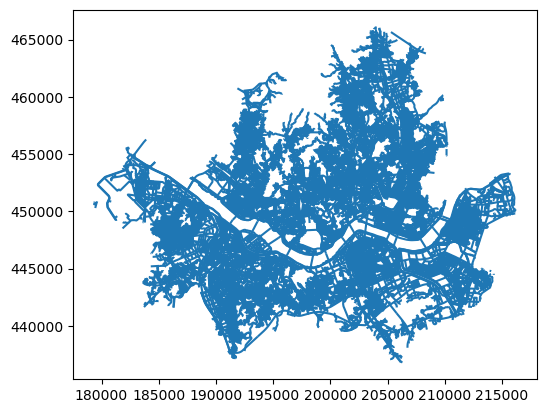

In [52]:
road_shape_data.plot()

In [60]:
seoul = road_shape_data.SIG_CD
seoul

0        11260
1        11290
2        11230
3        11230
4        11290
         ...  
66997    11305
66998    11680
66999    11680
67000    11680
67001    11410
Name: SIG_CD, Length: 67002, dtype: object

In [61]:
road_shape_data.SIG_CD == '11560'

0        False
1        False
2        False
3        False
4        False
         ...  
66997    False
66998    False
66999    False
67000    False
67001    False
Name: SIG_CD, Length: 67002, dtype: bool

In [62]:
road_shape_data[road_shape_data['RN'].str.contains('여의', na=False)]

,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,...,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD,geometry
849,20100520,여의대방로에서 분기되는 도로로 해당 일련번호 활용,21,Yeouidaebang-ro 43-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100527,20141030224649,신길동 869-2,...,1033,신길동 897-3,여의대방로43길,4154663,15.0,32.00,4,11560,3,"LINESTRING (193134.989 445185.836, 193142.381 ..."
926,20100520,여의대방로에서 분기되는 도로로 해당 일련번호 활용,21,Yeouidaebang-ro 61-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100527,20141030224649,신길동 1351-3,...,1622,신길동 18-1,여의대방로61길,4154683,6.0,24.00,4,11560,3,"LINESTRING (193228.886 446180.412, 193238.037 ..."
1106,20090701,여의도의 주요도로,20,Yeoui-daero,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20090710,20141030224649,여의도동 28-3,...,3287,여의도동 86-4,여의대로,2118001,40.0,2653.00,2,11560,3,"LINESTRING (192704.760 446895.793, 192743.199 ..."
1341,20100520,여의대방로에서 분기되는 도로로 해당 일련번호 활용,20,Yeouidaebang-ro 47ra-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100527,20141030224649,신길동 458-5,...,1496,신길동 970,여의대방로47라길,4154672,5.0,38.00,4,11560,3,"LINESTRING (192989.464 445410.090, 193015.233 ..."
1350,20100520,여의대방로에서 분기되는 도로로 해당 일련번호 활용,21,Yeouidaebang-ro 61-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100527,20141030224649,신길동 1351-3,...,1047,신길동 18-1,여의대방로61길,4154683,6.0,37.00,4,11560,3,"LINESTRING (193203.545 446194.818, 193226.592 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66472,20100520,여의대방로에서 분기되는 도로로 해당 일련번호 활용,20,Yeouidaebang-ro 47da-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100527,20141030224649,신길동 463-1,...,2474,신길동 88-42,여의대방로47다길,4154671,6.0,14.00,4,11560,3,"LINESTRING (193054.270 445626.640, 193040.038 ..."
66684,20100520,여의대방로에서 분기되는 도로로 해당 일련번호 활용,21,Yeouidaebang-ro 53-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100527,20141030224649,신길동 1266,...,2406,신길동 95-201,여의대방로53길,4154676,8.0,27.00,4,11560,3,"LINESTRING (193063.431 445842.031, 193055.895 ..."
66880,20210611,여의천을 따라 개설된 서쪽 자전거길,20,Yeouicheonseojajeongeo-gil,20210305,여의천을 따라 개설된 서쪽 자전거길,01,20210611,20210305155807,양재동 233,...,5227,신원동 136-7,여의천서자전거길,4859676,1.5,4279.12,4,11650,3,"LINESTRING (203320.457 441550.121, 203320.940 ..."
66883,20210611,여의천을 따라 개설된 동쪽 자전거길,20,Yeouicheondongjajeongeo-gil,20210305,여의천을 따라 개설된 동쪽 자전거길,01,20210611,20210305155658,양재동 233,...,5228,신원동 136-25,여의천동자전거길,4859675,1.5,3462.00,4,11650,3,"LINESTRING (203343.157 441546.714, 203343.260 ..."


In [66]:
yeoui = road_shape_data[road_shape_data['SIG_CD'].str.contains('11560', na=False)]
yeoui

,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,...,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD,geometry
753,20100520,도신로에서 분기되는 도로로 해당 일련번호 활용,10,Dosin-ro 9-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100527,20141030224646,대림동 604-148,...,3690,대림동 607-1,도신로9길,4154355,0.883,14.153,4,11560,3,"LINESTRING (190886.627 445088.597, 190894.248 ..."
814,20100520,도신로에서 분기되는 도로로 해당 일련번호 활용,20,Dosin-ro 29sa-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100527,20141030224645,도림동 117-36,...,1968,도림동 129-27,도신로29사길,4154323,3.000,15.000,4,11560,3,"LINESTRING (191665.219 445652.131, 191670.948 ..."
815,20100520,도림로에서 분기되는 도로로 해당 일련번호 활용,21,Dorim-ro 53-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100527,20141030224644,대림동 760-11,...,3039,대림동 743-4,도림로53길,4154258,6.000,37.000,4,11560,3,"LINESTRING (191268.758 444189.103, 191293.867 ..."
816,20100520,경인로에서 분기되는 도로로 해당 일련번호 활용,21,Gyeongin-ro 78-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100527,20141030224642,문래동1가 58-22,...,3371,문래동1가 66-7,경인로78길,4154053,5.000,50.000,4,11560,3,"LINESTRING (190710.434 445703.459, 190666.274 ..."
817,20090710,서울에서 인천을 연결하는 도로,20,Gyeongin-ro,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20090710,20141030224639,문래동1가 97-1,...,3382,여의도동 28-3,경인로,3000028,4.000,28004.000,3,11560,1,"LINESTRING (191573.958 446296.176, 191634.207 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66934,20210226,하천명(안양천)과 방위(안양천의 서쪽에 위치)를 활용하여 명명,20,Anyangcheonseojajeongeo-gil,20210316,도로명부여,01,20210226,20210316144246,서울특별시 영등포구 문래동6가 52(463),...,3924,서울특별시 영등포구 문래동5가 31(492),안양천서자전거길,4859684,2.000,15512.000,4,11560,1,"LINESTRING (189332.453 446761.947, 189332.754 ..."
66935,20201119,하천명을 이용하여 명명,20,Dorimcheondongjajeongeo-gil,20210315,도로명부여,01,20201119,20210315144152,서울특별시 영등포구 대림동 808-21(628),...,3863,서울특별시 영등포구 대림동 994-30(880),도림천동자전거길,4859337,3.000,8901.000,4,11560,2,"LINESTRING (190721.627 443765.032, 190751.976 ..."
66936,20201119,하천명을 이용하여 명명,20,Dorimcheondongjajeongeo-gil,20210315,도로명부여,01,20201119,20210315144025,서울특별시 영등포구 문래동5가 35(32),...,3864,서울특별시 영등포구 대림동 646-1 (484),도림천동자전거길,4859337,3.000,8901.000,4,11560,2,"LINESTRING (189630.408 446231.224, 189662.780 ..."
66984,20220114,서울시에서 고시한 노선명 ‘서부간선지하도로’를 인용하여 부여,20,Seobuganseon-jihadoro,20220114,도로명부여,01,20220114,20220114151404,서울특별시 영등포구 문래동5가 31(626),...,4043,서울특별시 영등포구 양평동6가 76-1(946),서부간선지하도로,3353699,40.000,27260.000,3,11560,1,"MULTILINESTRING ((189297.025 446496.423, 18930..."


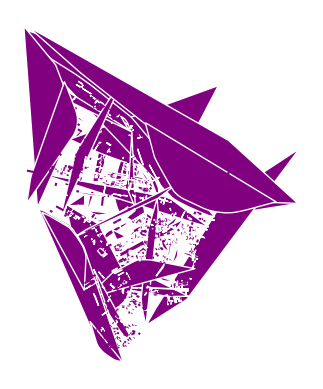

In [72]:
import matplotlib.pyplot as plt

ax = yeoui.convex_hull.plot(color = 'purple', edgecolor="w")
ax.set_axis_off()
plt.show()

In [73]:
# 3. 도로 라인을 10m 간격의 포인트로 변환합니다.
from shapely.geometry import Point

def line_to_points(linestring, interval=10):
    """라인을 주어진 간격의 포인트로 변환하는 함수"""
    points = []
    length = linestring.length
    num_points = int(length / interval) + 1
    for i in range(num_points):
        point = linestring.interpolate(i * interval)
        points.append(Point(point.x, point.y))
    return points

In [74]:
import numpy as np
from shapely.geometry import Point, LineString

# 도로 라인을 10m 간격의 포인트로 변환하는 함수
def line_to_points(linestring, interval=10):
    length = linestring.length
    return [linestring.interpolate(distance) for distance in np.arange(0, length, interval)]

In [20]:
# 가상의 도로 데이터 기반으로 10m 간격의 포인트를 생성
sample_road = LineString([(1018385.186, 1682660.628), (1018385.7, 1682660.5)])
all_points = line_to_points(sample_road)

all_points

[<POINT (1.02e+06 1.68e+06)>]

In [22]:
# 가상의 도로 데이터와 유동인구 데이터를 기반으로 유동인구 할당
# (실제 데이터 연결은 제공된 데이터에 따라 다를 수 있습니다.)
# 가상의 도로 데이터와 유동인구 데이터를 기반으로 유동인구 할당
sample_road_id = "1000035715049A00110000000000000001"
sample_population = population_data[population_data["RD_LINK_ID"] == sample_road_id].FLPOP_CO.sum()

sample_population

0

In [9]:
# 4. 각 10m 포인트에 유동인구 데이터를 할당합니다.
# 유동인구 데이터와 도로링크 데이터의 형식에 따라 할당 로직을 작성합니다.
for idx, row in gdf.iterrows():
    road_id = row['road_id']  # 이 부분은 실제 도로 ID 컬럼에 맞게 수정해야 합니다.
    population = population_data[population_data['road_id'] == road_id]['population'].values[0]
    for point in row['points']:
        # 포인트별로 할당할 유동인구 데이터를 계산합니다. (예: 도로의 전체 인구 / 포인트 수)
        point_population = population / len(row['points'])


KeyError: 'road_id'

In [ ]:
# 5. 추정된 포인트를 다시 라인으로 변환하여 화면에 표출합니다.
gdf['geometry'] = gdf['points'].apply(LineString)
gdf.plot()